In [71]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import numpy as np

In [72]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        45
           1       0.88      0.87      0.87        52
           2       0.86      0.81      0.83        53
           3       0.80      0.83      0.82        54
           4       0.86      0.90      0.88        48
           5       0.94      0.89      0.92        57
           6       0.89      0.90      0.89        60
           7       0.92      0.92      0.92        53
           8       0.78      0.70      0.74        

In [66]:
classifier = DecisionTreeClassifier(random_state=0,min_samples_split=200, min_samples_leaf=50, max_depth=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.26      0.29      0.27        52
           2       0.69      0.72      0.70        53
           3       0.64      0.83      0.73        54
           4       0.71      0.75      0.73        48
           5       0.85      0.70      0.77        57
           6       0.86      0.85      0.86        60
           7       0.80      0.60      0.69        53
           8       0.00      0.00      0.00        

/Users/joachimnilsson/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


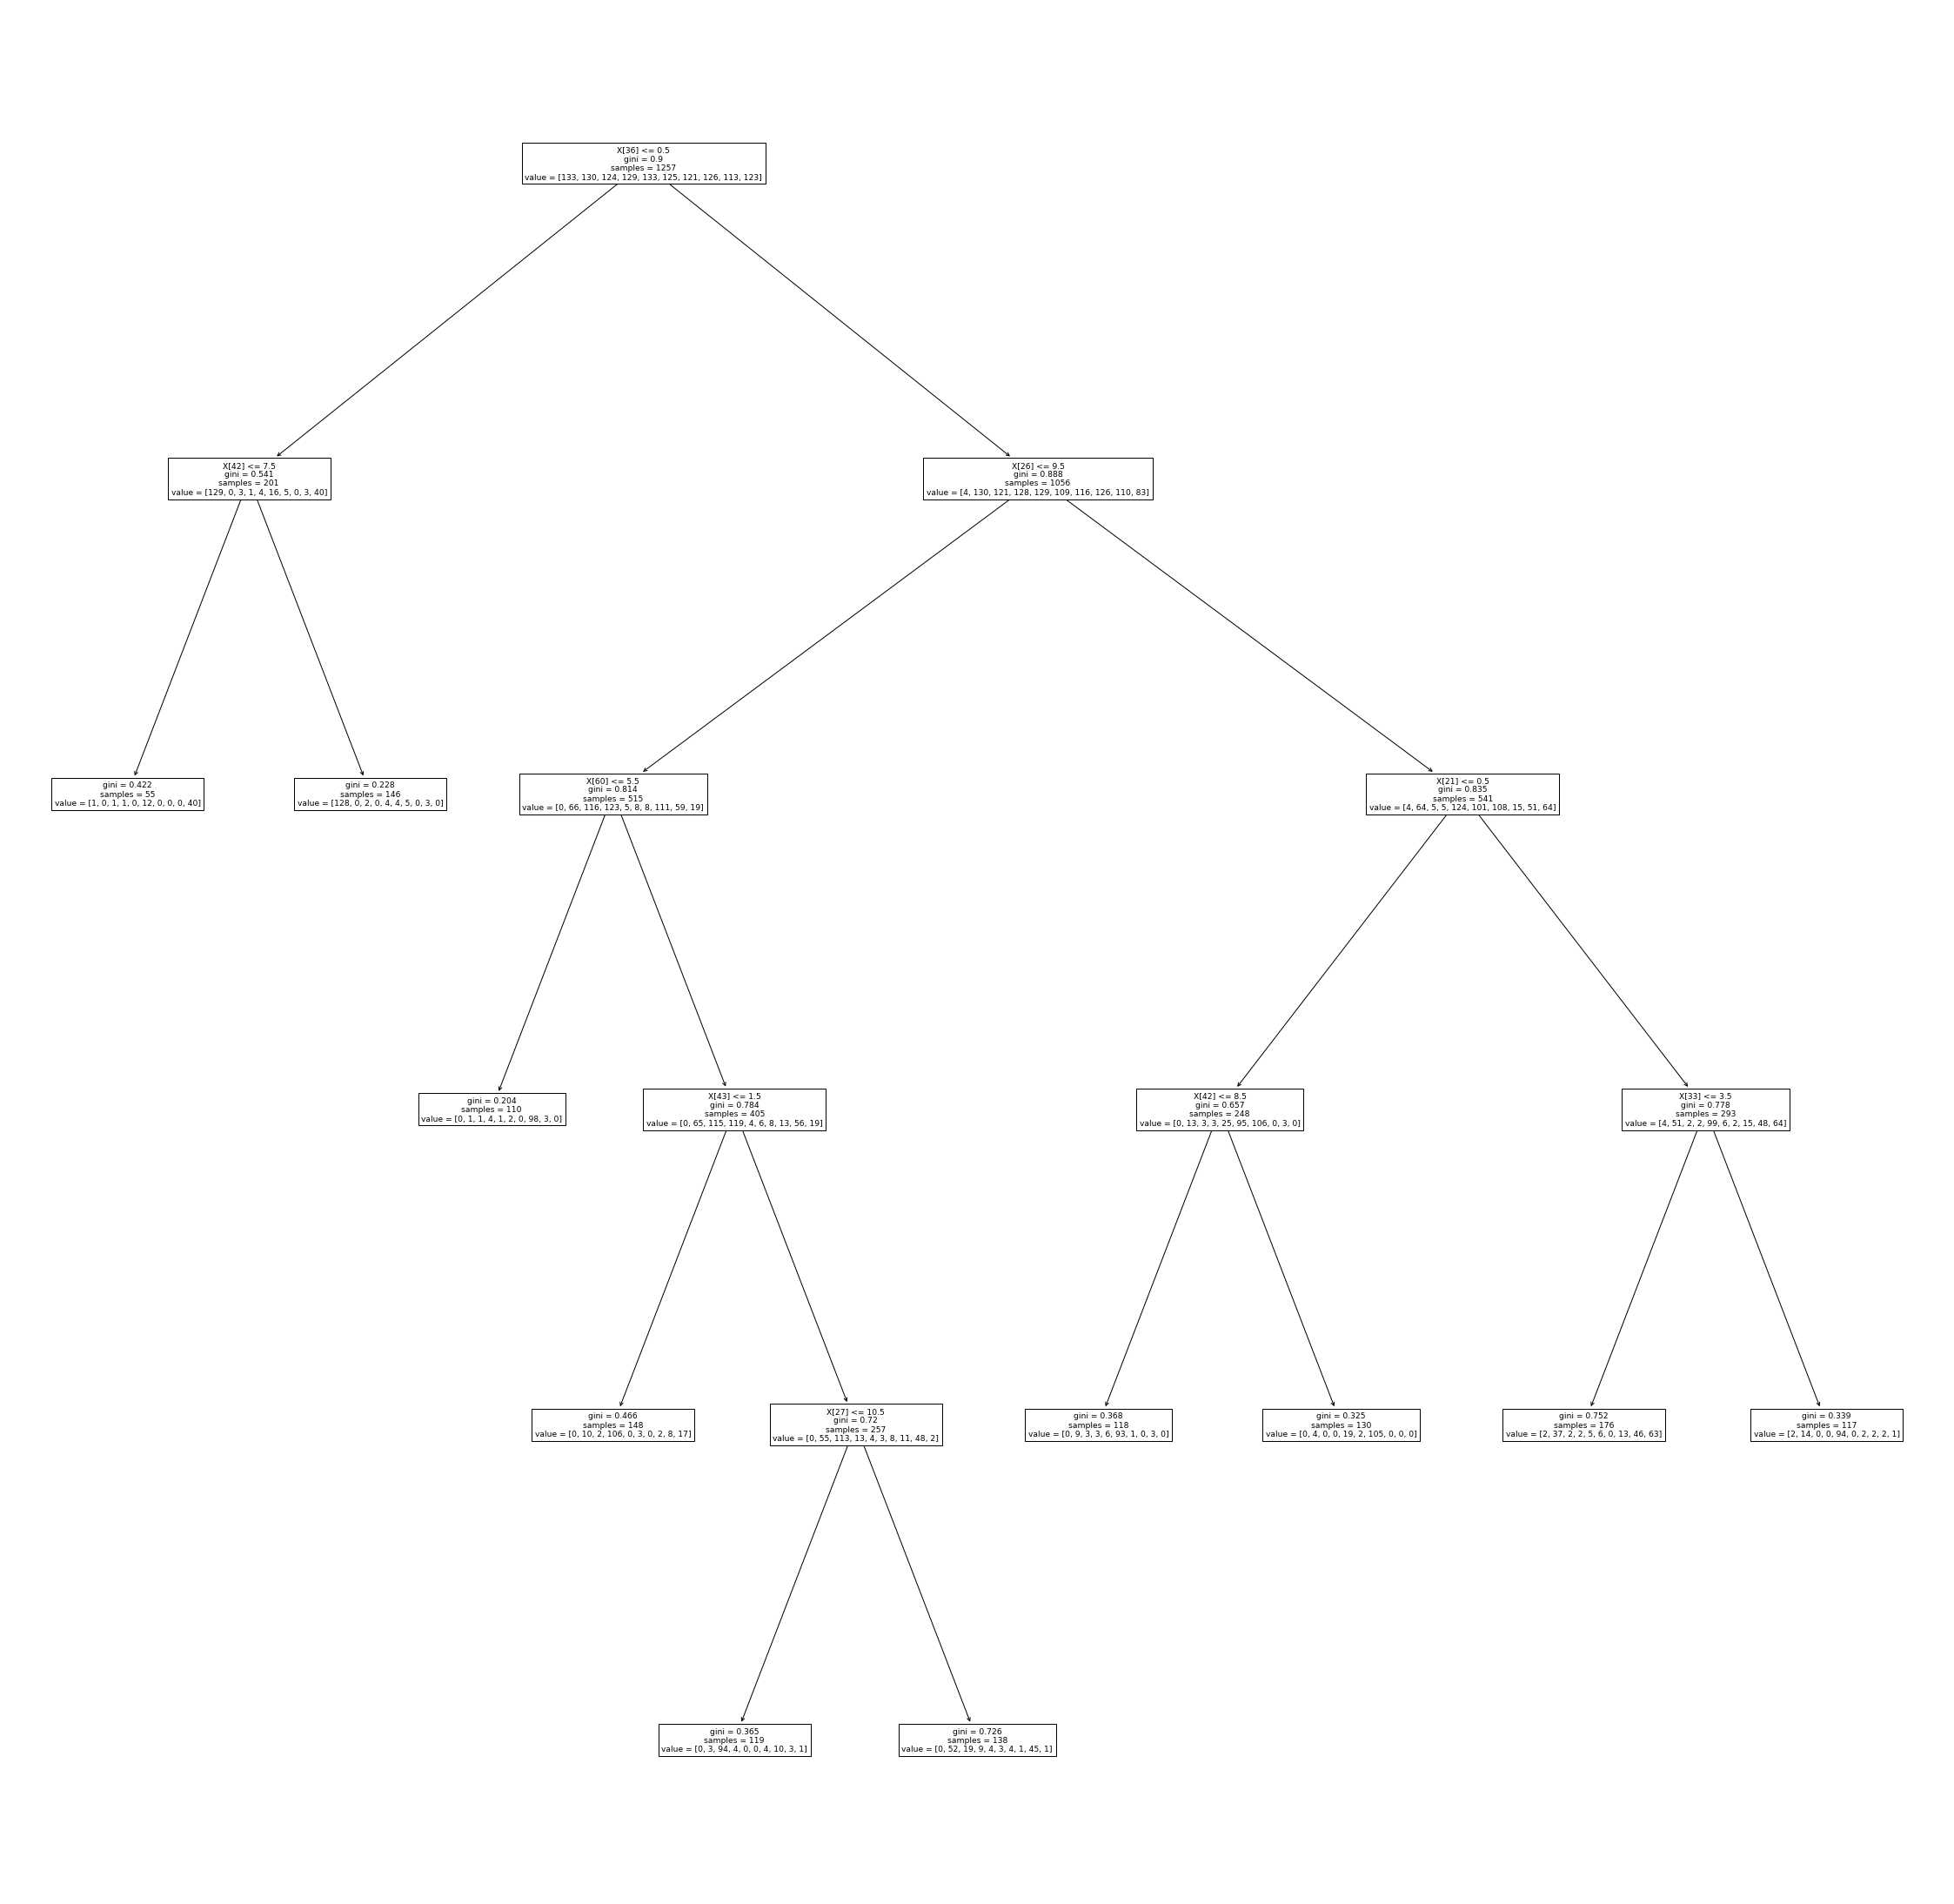

In [67]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40,40))
tree.plot_tree(classifier)
plt.show()

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.26      0.29      0.27        52
           2       0.69      0.72      0.70        53
           3       0.64      0.83      0.73        54
           4       0.71      0.75      0.73        48
           5       0.85      0.70      0.77        57
           6       0.86      0.85      0.86        60
           7       0.80      0.60      0.69        53
           8       0.00      0.00      0.00        

/Users/joachimnilsson/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from ID3 import ID3DecisionTreeClassifier
from collections import OrderedDict

id3 = ID3DecisionTreeClassifier()
attribute_vals = list(np.unique(X_train))
attributes = [attribute_vals for i in range(64)]
attribute_dict = OrderedDict(zip(range(64),attributes))
X_train_tuple = [tuple(image) for image in X_train]


myTree = id3.fit(X_train_tuple, tuple(y_train), attribute_dict, tuple(np.unique(y_train)))
#print(myTree)
    
plot = id3.make_dot_data()
plot.render("digitsTree")
X_test_tuple = [tuple(image) for image in X_test]
predicted = id3.predict(X_test_tuple, myTree, attribute_dict)
print(predicted)
print(y_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report for classifier :\n%s\n"
      % (classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, predicted))


id: 0
value: -
attribute: 34
entropy: 3.3204038854640983
samples: 1257
classCounts: Counter({4: 133, 0: 133, 1: 130, 3: 129, 7: 126, 5: 125, 2: 124, 9: 123, 6: 121, 8: 113})

id: 1
value: 0.0
attribute: 43
entropy: 2.40646415314367
samples: 314
classCounts: Counter({3: 97, 2: 85, 9: 61, 1: 30, 5: 21, 7: 12, 8: 7, 4: 1})
0 -> 1

id: 2
value: 0.0
attribute: 26
entropy: 1.6423531753039762
samples: 170
classCounts: Counter({3: 85, 9: 59, 5: 14, 1: 10, 2: 2})
1 -> 2

id: 3
value: 0.0
attribute: 19
entropy: 0.4548212080139121
samples: 75
classCounts: Counter({3: 70, 9: 2, 1: 2, 2: 1})
2 -> 3

id: 4
value: 0.0
label: 3
entropy: 0.0
samples: 29
classCounts: Counter({3: 29})
3 -> 4

id: 5
value: 1.0
label: 3
entropy: 0.0
samples: 12
classCounts: Counter({3: 12})
3 -> 5

id: 6
value: 2.0
label: 3
entropy: 0.0
samples: 8
classCounts: Counter({3: 8})
3 -> 6

id: 7
value: 3.0
label: 3
entropy: 0.0
samples: 6
classCounts: Counter({3: 6})
3 -> 7

id: 8
value: 4.0
label: 3
entropy: 0.0
samples: 4
cla

In [44]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ..., 16.,  4.,  0.],
       [ 0.,  0.,  0., ..., 12.,  8.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [61]:
bins = np.array([4,10])
X_train_mod = np.digitize(X_train,bins,right=True)
X_test_mod = np.digitize(X_test,bins,right=True)


id3 = ID3DecisionTreeClassifier()
attribute_vals_mod = list(np.unique(X_train_mod))
attributes_mod = [attribute_vals_mod for i in range(64)]
attribute_dict_mod = OrderedDict(zip(range(64),attributes_mod))
X_train_tuple_mod = [tuple(image) for image in X_train_mod]

myTree_mod = id3.fit(X_train_tuple_mod, tuple(y_train), attribute_dict_mod, tuple(np.unique(y_train)))
#print(myTree)
    
plot = id3.make_dot_data()
plot.render("digitsTree_mod")
X_test_tuple_mod = [tuple(image) for image in X_test_mod]
predicted_mod = id3.predict(X_test_tuple_mod, myTree_mod, attribute_dict_mod)
print(predicted_mod)
print(y_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report for classifier :\n%s\n"
      % (classification_report(y_test, predicted_mod)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, predicted_mod))


id: 0
value: -
attribute: 26
entropy: 3.3204038854640983
samples: 1257
classCounts: Counter({4: 133, 0: 133, 1: 130, 3: 129, 7: 126, 5: 125, 2: 124, 9: 123, 6: 121, 8: 113})

id: 1
value: 0
attribute: 43
entropy: 2.4378163260681927
samples: 396
classCounts: Counter({3: 116, 2: 105, 7: 79, 1: 36, 8: 34, 9: 21, 6: 2, 5: 1, 0: 1, 4: 1})
0 -> 1

id: 2
value: 0
attribute: 30
entropy: 1.6288326543415745
samples: 160
classCounts: Counter({3: 109, 9: 21, 8: 11, 7: 7, 1: 5, 2: 5, 0: 1, 6: 1})
1 -> 2

id: 3
value: 0
attribute: 19
entropy: 1.2262048292920236
samples: 139
classCounts: Counter({3: 109, 8: 10, 9: 9, 1: 5, 2: 4, 0: 1, 6: 1})
2 -> 3

id: 4
value: 0
attribute: 28
entropy: 0.3319330987000534
samples: 89
classCounts: Counter({3: 85, 2: 2, 0: 1, 6: 1})
3 -> 4

id: 5
value: 0
attribute: 2
entropy: 1.0
samples: 2
classCounts: Counter({0: 1, 2: 1})
4 -> 5

id: 6
value: 0
label: 0
entropy: 0.0
samples: 1
classCounts: Counter({0: 1})
5 -> 6

id: 7
value: 1
label: 2
entropy: 0.0
samples: 1
cla